# WeatherPy
----

### Analysis
* As a city is located closer to the equator the temperature becomes warmer.  There is a dramatic difference in the temperate between the southern hemisphere and the northern hemisphere.  The southern hemisphere is extremely warm at this time which correlates with the fact that the southern hemisphere is experiencing summer while the northern hemisphere is experiencing winter.
* There is no strong relationship between latitude and humidity. However, it is interesting to see that a large clump of cities between the 30 to 70 degree latitude experience humidity above 50%.
* There is no strong relationship between latitude and wind speed. However, no matter the hemisphere during this time a significant amount of the cities experience wind speeds of less than 13 mph.


In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

cityname = []
cloud = []
country = []
date = []
humidity = []
lat = []
lon = []
mtemp = []
wspeed = []
index = 1

for city in cities:
    try:
        print(f"Processing record {index} | {city}.")
        response = requests.get(query_url + city).json()
        cityname.append(response['name'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        mtemp.append(response['main']['temp_max'])
        wspeed.append(response['wind']['speed'])
        index = index + 1
        time.sleep(1)
    
    except (KeyError, IndexError):
        
        print("Missing field/result... skipping.")
        index = index + 1
        time.sleep(1)
        

Processing record 1 | faanui.
Processing record 2 | puerto ayora.
Processing record 3 | mataura.
Processing record 4 | busselton.
Processing record 5 | vaini.
Processing record 6 | manzanillo.
Processing record 7 | lompoc.
Processing record 8 | saint-philippe.
Processing record 9 | ulaangom.
Processing record 10 | amderma.
Missing field/result... skipping.
Processing record 11 | kapaa.
Processing record 12 | lavrentiya.
Processing record 13 | opuwo.
Processing record 14 | khatanga.
Processing record 15 | dolbeau.
Missing field/result... skipping.
Processing record 16 | port macquarie.
Processing record 17 | meulaboh.
Processing record 18 | ostrovnoy.
Processing record 19 | ushuaia.
Processing record 20 | hermanus.
Processing record 21 | punta arenas.
Processing record 22 | key largo.
Processing record 23 | mount gambier.
Processing record 24 | hofn.
Processing record 25 | along.
Processing record 26 | tuatapere.
Processing record 27 | jalu.
Processing record 28 | atuona.
Processing rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
weather_dict = {
    "City": cityname,
    "Cloudiness": cloud,
    "Country": country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lon" : lon,
    "Max Temp" : mtemp,
    "Wind Speed" : wspeed
}

city_data = pd.DataFrame(weather_dict)
city_data.to_csv("cities.csv", encoding="utf-8", index=False)
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Faanui,76,PF,1547684288,99,-16.48,-151.75,84.62,12.24
1,Puerto Ayora,75,EC,1547683200,69,-0.74,-90.35,82.40,14.99
2,Mataura,68,NZ,1547684291,89,-46.19,168.86,63.42,7.76
3,Busselton,68,AU,1547684292,100,-33.64,115.35,66.93,9.78
4,Vaini,0,IN,1547684293,84,15.34,74.49,57.89,3.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

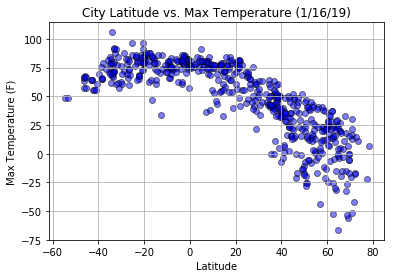

In [48]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.5, linewidths=1)
plt.grid()
plt.title("City Latitude vs. Max Temperature (1/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("latvtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

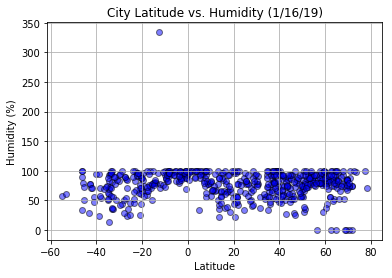

In [49]:
plt.scatter(city_data['Lat'], city_data['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.5, linewidths=1)
plt.grid()
plt.title("City Latitude vs. Humidity (1/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("latvhum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

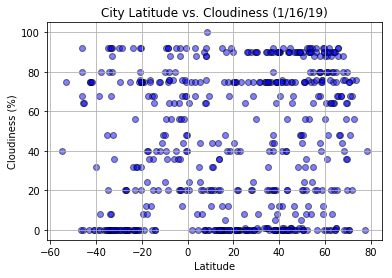

In [50]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.5, linewidths=1)
plt.grid()
plt.title("City Latitude vs. Cloudiness (1/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("latvcloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

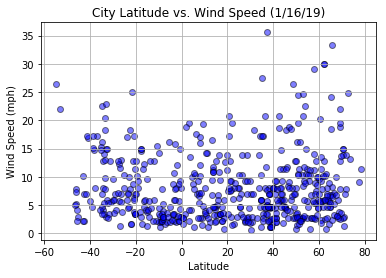

In [52]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.5, linewidths=1)
plt.grid()
plt.title("City Latitude vs. Wind Speed (1/16/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("latvwspeed.png")
plt.show()